## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 9.4: HI map of the Galaxy, stretched in latitude to show the warp 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
%matplotlib inline

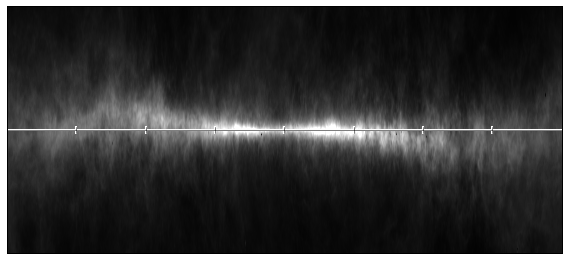

In [11]:
fig = plt.figure(figsize=(8,3.8))

hdu = fits.open('HI4PI.fits')
ax1 = fig.add_subplot(111)
im = hdu[0].data / 1e21
hd = hdu[0].header
hdu.close()

i = 1 + np.arange(hd['NAXIS1'])
lon = hd['CRVAL1'] + (i - hd['CRPIX1']) * hd['CDELT1']
j = 1 + np.arange(hd['NAXIS2'])
lat = hd['CRVAL2'] + (i - hd['CRPIX2']) * hd['CDELT2']

imin, imax = 0, hd['NAXIS1']-1
xmin = lon[imin]
xmax = lon[imax]
#print(xmin, xmax)

jmin, jmax = 0, hd['NAXIS2']-1
jmin, jmax = 200, 400
ymin = lat[jmin]
ymax = lat[jmax]
#print(ymin, ymax)

# stretch y-axis by a factor of 3
ymin *= 4
ymax *= 4

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
#print(im.min(), im.max())
ax1.imshow(im[jmin:jmax+1, imin:imax+1], cmap='gray', origin='lower', extent=[xmin, xmax, ymin, ymax], vmin=0, vmax=18)
ax1.tick_params(axis='both', which='both', length=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)

# plot galactic plane
plt.plot([xmin,xmax], [0,0], color='white', lw=2)
plt.plot([0,0], [-2,2], color='white', lw=2)
plt.plot([45,45], [-2,2], color='white', lw=2)
plt.plot([90,90], [-2,2], color='white', lw=2)
plt.plot([135,135], [-2,2], color='white', lw=2)
plt.plot([-45,-45], [-2,2], color='white', lw=2)
plt.plot([-90,-90], [-2,2], color='white', lw=2)
plt.plot([-135,-135], [-2,2], color='white', lw=2)
plt.plot([xmin,xmax], [0,0], color='black', lw=0.5)
plt.plot([0,0], [-2,2], color='black', lw=0.5)
plt.plot([45,45], [-2,2], color='black', lw=0.5)
plt.plot([90,90], [-2,2], color='black', lw=0.5)
plt.plot([135,135], [-2,2], color='black', lw=0.5)
plt.plot([-45,-45], [-2,2], color='black', lw=0.5)
plt.plot([-90,-90], [-2,2], color='black', lw=0.5)
plt.plot([-135,-135], [-2,2], color='black', lw=0.5)

plt.tight_layout()
plt.savefig('HI_warp.pdf')